In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0

In [24]:
x_train = x_train.reshape(x_train.shape[0], -1)

In [25]:
# Số lượng lớp
num_classes = 10

# One-hot encoding cho nhãn
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

In [26]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [27]:
# Các phương pháp tối ưu hóa cần được so sánh
optimizers = {
    'Gradient Descent': tf.keras.optimizers.SGD(),
    'Stochastic Gradient Descent': tf.keras.optimizers.SGD(momentum=0.0, nesterov=False),
    'Momentum': tf.keras.optimizers.SGD(momentum=0.9, nesterov=False),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Adam': tf.keras.optimizers.Adam()
}

In [28]:
# Hàm huấn luyện
def train(optimizer):
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)
    return history.history['accuracy']


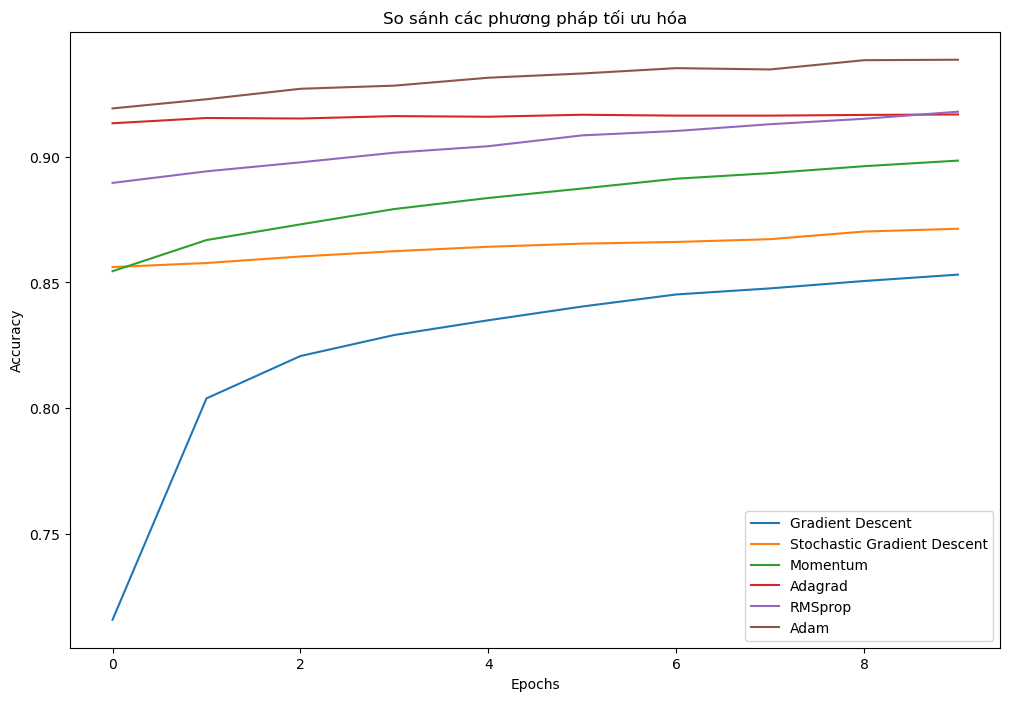

In [29]:
# So sánh các phương pháp tối ưu hóa
plt.figure(figsize=(12, 8))

for opt_name, optimizer in optimizers.items():
    acc_history = train(optimizer)
    plt.plot(acc_history, label=opt_name)

plt.title('So sánh các phương pháp tối ưu hóa')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()